# Civil Conflicts
<br>

**Estimated Time:** 30-40 Minutes. <br>
**Databook created by:** Lauren Hom and Ravi Singhal in collaboration with Professor Aila Matanock and Head GSI Alex Stephenson for Political Science 5: Introduction to International Relations


Today we will be examining a dataset (i.e. a table) on civil conflicts around the world from 1946-2013. The data, which contains information on various types of conflicts, comes from the Uppsala Conflict Data Program (UCDP). We will be exploring what rows and columns represent in the UCDP Conflict Temination Dataset v.2-2015 (Kreutz 2010), as well as analyzing some trends in conflict and its termination over time.


### Table of Contents 
1. [Jupyter Introduction](#0) <br>
1. [The Dataset](#1)<br>
    2.1 [Rows](#1a)<br>
    2.2 [Columns](#1b)<br>
1. [Civil Conflict Analysis](#2)<br>
    3.1 [Civil Conflicts Over Time](#2a)<br>
    3.2 [Intensity Level](#2b)<br>
    3.3 [Outcome](#2c)<br>
1. [Choose a Conflict](#3)
1. [Homework](#4)<br>
1. [Data Science Opportunities at UC Berkeley](#5)<br>
1. [Bibliography](#6)

# 1. Jupyter Introduction <a id='0'></a>

This webpage is a Jupyter Notebook. We will use this notebook to analyze the Uppsala Conflict Data Program's (UCDP) Conflict Termination Dataset v.2-2015 (Kreutz 2010). Jupyter Notebooks are composed of both regvular text and code cells. Code cells have a gray background. In order to run a code cell, click the cell and press `Shift + Enter` while the cell is selected or hit the `▶| Run` button in the toolbar at the top. An example of a code cell is below. You can also save your work using the button on the top left hand corner.

This code cell imports packages and methods that will be utilized throughout for analysis (e.g. creating graphs, widgets, etc.). Try running it. If everything works properly, the word "Success" should be printed under the cell.

In [27]:
# This cell sets up the notebook. Just run this cell.
from datascience import *
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

print("Success!")

Success!


<br><br><br><br><br><br><br><br><br>
# 2. The Dataset <a id='1'></a>

The UCDP Conflict Termination Dataset v.2-2015 (Kreutz 2010) contains information about conflicts around world from 1946-2013. A **dataset** is a table with rows and columns that contain values. The dataa in this set are part of a larger collection project by UCPD, and it uses common definitions for armed conflicts, and this particular dataset focuses on their termination:

> "Armed conflict is defined by Uppsala Conflict Data Program (UCDP) \[as\] a contested incompatibility that concerns government and/or territory where the use of armed force between two parties, of which at least one is the government of a state, results in at least 25 battle-related deaths in a calender-year."

> "A conflict episode, thus, is defined as the a \[sic] continuous period of active conflict years in the UCDP-PRIO armed conflict dataset. A conflict episode ends when an active year is followed by a year in which there are fewer than 25 battle-related deaths."


<br>If you want to read more about the UCDP data, click [here](https://www.pcr.uu.se/research/ucdp/).

<br>Here are the first 5 rows of the data-set. You can scroll horizontally when hovering over the table to see the whole data set.

In [28]:
raw = Table.read_table('ucdp-term-dyadic-2015.csv') # read in the dataset
raw.show(5)

ConflictId,DyadId,DyadEp,Year,Location,SideA,SideA2nd,SideB,SideBID,SideB2nd,Incompatibility,TerritoryName,IntensityLevel,TypeOfConflict,Type2,StartDate,StartPrec,StartDate2,StartPrec2,Dyadterm,EpEndDate,EpEndPrec,Outcome_early,Outcome,CfireDate,PeAgDate,GWNoA,GWNoA2nd,GWNoB,GWNoB2nd,GWNoLoc,Region,Version
1-191,1,101,1992,Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,1993,Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,1994,Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,2,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,1995,Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,1996,Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015


As you can see, this is a large dataset. We have cleaned the dataset by removing some conflicts that were not civil conflicts, removing some features of these conflicts (removing some columns), and making the description of the features (the labels) more readable. The cleaned dataset has 12 columns.

In [29]:
wars = Table.read_table('oneWar.csv') # read in the dataset
wars.show(5)

ConflictId,DyadId,Location,SideA,SideB,DisagreementOver,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,Region
1-191,1,Algeria,Government of Algeria,AIS,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,08/27/1985,10/01/1997,Ceasefire,Africa
1-191,2,Algeria,Government of Algeria,Takfir wa'l Hijra,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,12/20/1990,12/31/1991,Actor ceases to exist,Africa
1-191,3,Algeria,Government of Algeria,GIA,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,02/10/1992,12/31/2003,Low activity (less than 25 battle-deaths),Africa
1-131,7,Angola,Government of Angola,UNITA,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,11/11/1975,12/24/1995,Low activity (less than 25 battle-deaths),Africa
1-90,11,Burundi,Government of Burundi,Palipehutu,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,11/23/1991,04/14/1992,Low activity (less than 25 battle-deaths),Africa


Note that both the number of **columns** and the number of **rows** have changed. Run the cell below to compare the number of rows from the original dataset to the cleaned dataset.

In [30]:
print("The original dataset had {} rows. \n\
After removing some rows that are not civil conflicts, the dataset has {} rows left.".format(raw.num_rows, wars.num_rows))

The original dataset had 2741 rows. 
After removing some rows that are not civil conflicts, the dataset has 403 rows left.


Let's take a closer look at the cleaned dataset.

<br><br><br><br><br><br><br>
## 2.1 Rows <a id='1a'></a>


First, let's examine what a *row* is. Here is the first row of the dataset.

In [31]:
wars.take(0) # take the first row

ConflictId,DyadId,Location,SideA,SideB,DisagreementOver,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,Region
1-191,1,Algeria,Government of Algeria,AIS,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,08/27/1985,10/01/1997,Ceasefire,Africa


This row gives us information about a specific conflict that happened in Algeria from 1985-1997. One thing to note is that the `IntensityLevel` of the conflict is Minor. As described in the `IntensityLevel` column, Minor indicates a conflict where there were between 25-999 battle-related deaths.

In [32]:
wars.take(29) # take the 30th row

ConflictId,DyadId,Location,SideA,SideB,DisagreementOver,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,Region
1-78,53,Ethiopia,Government of Ethiopia,EPLF,Territory,War (at least 1000 battle-related deaths),Internal armed conflict,09/30/1973,05/31/1991,Victory for Side B /Rebel Side,Africa


In comparison, by looking at the 30th row of the dataset, we can see that this conflict in Ethiopia has an `IntensityLevel` of War, meaning there were at least 1000 battle-related deaths.

<br><br><br><br><br><br><br>
## 2.2 Columns <a id='1b'></a>


Next, we will look at some of the columns in the dataset that allow us to better understand the information we are seeing.

### 2.2.1 Location
To understand what a *column* is, let's look at a few examples. First, let's examine the `Location` column. According to the codebook for the dataset (Kreutz 2010),
> "Location is defined as the government side of a conflict, and should not be interpreted as the geographical location of the conflict."

Here are the number of occurences of the 10 most common locations.

In [33]:
locations = wars.group('Location').sort('count', descending=True) # group by location and sort in descending order
locations

Location,count
Myanmar (Burma),37
India,24
Chad,19
Ethiopia,18
Uganda,14
Sudan,14
Israel,13
Russia (Soviet Union),10
Philippines,9
Iraq,8


### Discussion A

Discuss with a partner and together write a couple of sentences in each of your forms on the following prompt: Are any of the locations listed here are surprising? Consider factors such as geographic size and population of the location. 



*WRITE YOUR RESPONSE HERE. [NOTE: TO CHANGE THE TEXT, DOUBLE CLICK ON THE PLACEHOLDER TEXT, AND WHEN YOU ARE FINISHED, RUN THE CELL TO SAVE YOUR CHANGES]*

<br><br><br>
### 2.2.2 Region
Now let's look at the `Region` column. Again, first here are the conflicts in each region.

In [34]:
regions = wars.group('Region').sort('count', descending=True) # count occurences of each region
regions

Region,count
Africa,158
Asia,121
Americas,49
Middle East,42
Europe,33


Above, we can see that Africa is the region coded as having the highest `count`, which means that Africa has the largest number of conflicts out of any region.

<br><br><br><br><br><br><br><br><br>
# 3. Civil Conflict Analysis <a id='2'></a>
In this section, we will do further analysis on civil conflict occurrences. Here is the original dataset again.

In [35]:
wars.show(5)

ConflictId,DyadId,Location,SideA,SideB,DisagreementOver,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,Region
1-191,1,Algeria,Government of Algeria,AIS,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,08/27/1985,10/01/1997,Ceasefire,Africa
1-191,2,Algeria,Government of Algeria,Takfir wa'l Hijra,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,12/20/1990,12/31/1991,Actor ceases to exist,Africa
1-191,3,Algeria,Government of Algeria,GIA,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,02/10/1992,12/31/2003,Low activity (less than 25 battle-deaths),Africa
1-131,7,Angola,Government of Angola,UNITA,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,11/11/1975,12/24/1995,Low activity (less than 25 battle-deaths),Africa
1-90,11,Burundi,Government of Burundi,Palipehutu,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,11/23/1991,04/14/1992,Low activity (less than 25 battle-deaths),Africa


<br><br><br><br><br><br><br>
## 3.1 Civil Conflicts Over Time <a id='2a'></a>

Now, let's visualize how the number of civil conflicts varies over time. This line graph shows the number of civil conflicts in each year.

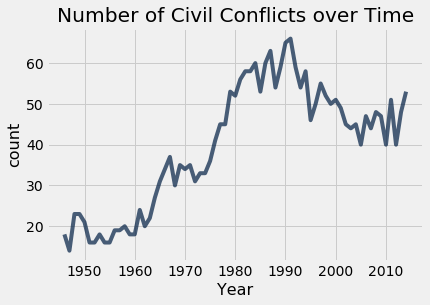

In [36]:
war_years = Table.read_table('cleanedWars.csv') # read in the dataset
war_years.set_format('Year', formats.FunctionFormatter(lambda x: x)) # fix format of year

civil_trend = war_years.group('Year') # count number of civil conflicts per year

civil_trend.plot('Year') # generate line graph
plt.title("Number of Civil Conflicts over Time") # title graph
plt.show()

### Discussion B <a id='3a'></a>

Discuss with a partner and together write a couple of sentences in each of your forms on the following prompt: Notice the spike in the number of conflicts during the 1990s, and, related an increasing trend in the number of total civil conflicts between 1946 and 1990. Then, what events are occurring around, and how might these events influence the trends we observe in the graph (above)? For some information to consider, think back to Fearon and Laitin 2003.

*WRITE YOUR RESPONSE HERE. [NOTE: TO CHANGE THE TEXT, DOUBLE CLICK ON THE PLACEHOLDER TEXT, AND WHEN YOU ARE FINISHED, RUN THE CELL TO SAVE YOUR CHANGES]*

<br><br><br><br><br><br><br>
## 3.2 Intensity Level <a id='2b'></a>
Let's take a closer look at the `IntensityLevel` column. 
>The intensity variable is coded in two categories (Kreutz 2010):
>1. Minor: between 25 and 999 battle-related deaths in a given year.
>2. War: at least 1,000 battle-related deaths in a given year.

Here are the number of conflicts for each type of intensity level, which is represented in the `count` column.

In [37]:
wars.group('IntensityLevel') # group by IntensityLevel

IntensityLevel,count
Minor (between 25 and 999 battle-related deaths),354
War (at least 1000 battle-related deaths),49


As you can see above, there are more "Minor" conflicts (354 occurences) versus "War" conflicts (49 occurences).

Each region now appears twice in the `Region` column: once for each type of intensity level. 
For example, in the first row, we can see that Africa had 143 "Minor" conflicts and, in the seventh row, we can see that Africa had 15 "War" conflicts. 

In [38]:
wars.group(['Region', 'IntensityLevel']).sort('count', descending=True).show() # group by Region and IntensityLevel

Region,IntensityLevel,count
Africa,Minor (between 25 and 999 battle-related deaths),143
Asia,Minor (between 25 and 999 battle-related deaths),106
Americas,Minor (between 25 and 999 battle-related deaths),44
Middle East,Minor (between 25 and 999 battle-related deaths),34
Europe,Minor (between 25 and 999 battle-related deaths),27
Asia,War (at least 1000 battle-related deaths),15
Africa,War (at least 1000 battle-related deaths),15
Middle East,War (at least 1000 battle-related deaths),8
Europe,War (at least 1000 battle-related deaths),6
Americas,War (at least 1000 battle-related deaths),5


Let's look specifically at the Middle East. Here are the counts of every type of conflict in each Middle East location.

In [39]:
# filter by region, then group by location and intensity level
m_east = wars.where('Region', 'Middle East').group(['Region', 'Location', 'IntensityLevel']).sort('count', descending=True).sort('IntensityLevel', descending=False)
m_east.show()

Region,Location,IntensityLevel,count
Middle East,Israel,Minor (between 25 and 999 battle-related deaths),13
Middle East,Iraq,Minor (between 25 and 999 battle-related deaths),7
Middle East,Iran,Minor (between 25 and 999 battle-related deaths),5
Middle East,Turkey,Minor (between 25 and 999 battle-related deaths),3
Middle East,Lebanon,Minor (between 25 and 999 battle-related deaths),2
Middle East,Yemen (North Yemen),Minor (between 25 and 999 battle-related deaths),1
Middle East,Syria,Minor (between 25 and 999 battle-related deaths),1
Middle East,Saudi Arabia,Minor (between 25 and 999 battle-related deaths),1
Middle East,Egypt,Minor (between 25 and 999 battle-related deaths),1
Middle East,Lebanon,War (at least 1000 battle-related deaths),3


We can see that the greatest number `Minor` conflicts happened in Israel (13 in total) while the great number of `War` conflicts happened in Lebanon (3 in total). 

The two rows that show this information from the data (above) are shown below.

In [40]:
m_east.take(0) # first row of the dataset, above

Region,Location,IntensityLevel,count
Middle East,Israel,Minor (between 25 and 999 battle-related deaths),13


In [41]:
m_east.take(9) # ninth row of the dataset, above

Region,Location,IntensityLevel,count
Middle East,Lebanon,War (at least 1000 battle-related deaths),3


So, the Middle East locations with the most `War` conflicts.

In [42]:
m_east.where('IntensityLevel', are.containing('War')) # filter to just show war rows

Region,Location,IntensityLevel,count
Middle East,Lebanon,War (at least 1000 battle-related deaths),3
Middle East,Yemen (North Yemen),War (at least 1000 battle-related deaths),2
Middle East,Syria,War (at least 1000 battle-related deaths),1
Middle East,South Yemen,War (at least 1000 battle-related deaths),1
Middle East,Iraq,War (at least 1000 battle-related deaths),1


Again, we can see that the greatest number of `War` conflicts are Lebanon, followed by Yemen (North Yemen), and so forth.  

<br><br><br><br><br><br><br>
## 3.3 Outcome <a id='2c'></a>

Next, let's examine the `Outcome` of the civil conflicts. Here are all the possible outcomes coded:

In [43]:
list(set(wars.column('Outcome')))

['Peace agreement',
 'Victory for Side A /Government Side',
 'Ceasefire',
 'Victory for Side B /Rebel Side',
 'Actor ceases to exist',
 'Low activity (less than 25 battle-deaths)']

The summary of what each outcome means comes from the codebook for the Conflict Termination Dataset v.2-2015 (Kreutz 2010): 

| Outcome | Description |
|-------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Actor ceases to exist | War activity continues with at least one party no longer existing or becoming a different type of party. For states, this means that the state became part of another country or a central government was no longer obvious. For rebel organizations, this means that the organization changed their name along with altering their alliances or territorial goals. |
| Ceasefire | Fighting stops, but not necessarily with any resolution. |
| Low activity (less than 25 battle-deaths) | War activity may continue, but fatality rates are below the fatality level defined by the authors of the dataset. |
| Peace agreement | An agreement signed by opposing sides to formally end the war. |
| Victory for Side A/Government Side | The government side of the war wins and the rebel side loses. |
| Victory for Side A/Rebel Side | The rebel side wins and the government side loses.

Here are the number of occurances of each outcome:

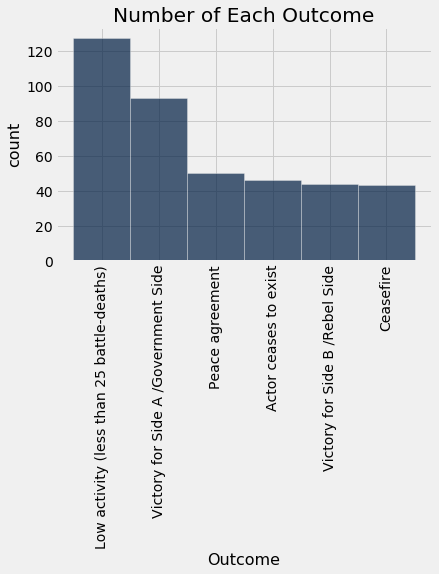

In [44]:
termination_count = wars.group('Outcome').sort('count', descending=True) # count number of each outcome
termination_count.bar('Outcome') # generate bar graph
plt.xticks(rotation=90) # make x axis labels vertical
plt.title("Number of Each Outcome") # title graph
plt.show()

We can see that the greatest number of conflicts are terminated through low activity, so that they no longer meet the battle-death threshold, but they do not terminate through a peace agreement or a victory, for example.

### Discussion C

Discuss with a partner and together write a couple of sentences in each of your forms on the following prompt: How often are rebels successful in civil wars? What other outcomes are striking? Compare peace agreements in Asia and Africa. What might explain the difference? Note: we are only looking at the top two regions in terms of the number of conflicts. Run the code cell below:

In [45]:
wars.group(['Region', 'Outcome']).where('Region', are.containing('Asia') | are.containing('Africa')).sort(
    'count', descending=True).sort('Region').show()

Region,Outcome,count
Africa,Low activity (less than 25 battle-deaths),48
Africa,Victory for Side A /Government Side,36
Africa,Peace agreement,32
Africa,Victory for Side B /Rebel Side,18
Africa,Actor ceases to exist,15
Africa,Ceasefire,9
Asia,Low activity (less than 25 battle-deaths),48
Asia,Victory for Side A /Government Side,27
Asia,Ceasefire,18
Asia,Actor ceases to exist,14


*WRITE YOUR RESPONSE HERE. [NOTE: TO CHANGE THE TEXT, DOUBLE CLICK ON THE PLACEHOLDER TEXT, AND WHEN YOU ARE FINISHED, RUN THE CELL TO SAVE YOUR CHANGES]*

<br><br><br><br>
Let's make a bar graph of the `IntensityLevel` for a particular year. A bar graph shows us the number of counts between categories for a particular feature. Run the cell below, then use the dropdown menu to select a year. After selecting a year, the graph will show the number of conflicts of each intensity level in the previous five years.

In [46]:
@interact(year=np.arange(1945, 2011, 5))
def year_graph(year):
    # filter data by chosen year and group by intensity level
    five_year = war_years.with_column('Fifth Year', (war_years.column('Year') // 5) * 5) # add column of year rounded to nearest 5
    one_year = five_year.where('Fifth Year', year).group('IntensityLevel').sort('IntensityLevel') # filter and sort by selected year
    plt.bar(one_year.column('IntensityLevel'), one_year.column('count')) # create bar graph
    plt.xticks((0, 1), ('Minor War', 'Major War')) # set x axis labels to be Minor and War
    plt.ylabel("Count") # set y axis label
    plt.title('Number of Conflicts of Each Intensity Level from {} to {}'.format(year, year + 4)) # set title of graph
    plt.show()

interactive(children=(Dropdown(description='year', options=(1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 19…

We can see two bars in the plot above describe the number of conflicts: one for `Minor` conflicts and one for the `War` conflicts based on the year you chose.

<br><br><br><br><br><br><br><br><br>
# 4. Choose a Conflict  <a id='3'></a>

Let's select a location in the dropdown menu. We can use this to view only the rows that correspond to the chosen location.

In [47]:
locations = np.sort(list(set(wars.column('Location'))))
@interact(location=locations)
def location_filter(location):
    wars.where('Location', location).show()

interactive(children=(Dropdown(description='location', options=('Afghanistan', 'Algeria', 'Angola', 'Argentina…

Use the cells above to choose a conflict that looks the most interesting to you. Once you find one, write down the `DyadId`. In the cell below, replace the `...` with the `DyadId` you chose. This will display the rows in the table that have the `DyadId` of your choice. Your selected `DyadId` will be the case on which you do research for your homework assignment.

In [48]:
dyadid = 476  # replace the ... with a DyadId
wars.where('DyadId', dyadid)

ConflictId,DyadId,Location,SideA,SideB,DisagreementOver,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,Region
1-137,476,Afghanistan,Government of Afghanistan,Military faction (forces of Shahnawaz Tanay),Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,03/06/1990,03/08/1990,Victory for Side A /Government Side,Asia


<br><br>
- -----------------------------------------------------
<br><br>
# 5. Homework <a id='4'></a>
<br><br>
### Problem 5.1: 
Write your dyad id, noting the location and years of the conflict as well, in the box below. 

*[NOTE: TO CHANGE THE TEXT, DOUBLE CLICK ON THE PLACEHOLDER TEXT, AND WHEN YOU ARE FINISHED, RUN THE CELL TO SAVE YOUR CHANGES.]*

### Problem 5.2: 
Examing the row from the dataset that you have chosen above, how did the Conflict Termination Dataset (above) code the outcome?

*[NOTE: TO CHANGE THE TEXT, DOUBLE CLICK ON THE PLACEHOLDER TEXT, AND WHEN YOU ARE FINISHED, RUN THE CELL TO SAVE YOUR CHANGES.]*

### Problem 5.3: 
Do you find the Conflict Termination Dataset problematic? Write your answer in the box below.

*[NOTE: TO CHANGE THE TEXT, DOUBLE CLICK ON THE PLACEHOLDER TEXT, AND WHEN YOU ARE FINISHED, RUN THE CELL TO SAVE YOUR CHANGES.]*

### Problem 5.4: 
Based on your understanding of the coding rules on termination type from the Conflict Termination Dataset (see the codebook [here](https://ucdp.uu.se/downloads/index.html#termination)), and perhaps the case you have just researched, what would be a change you would propose to create a different type of conflict termination? If such a change were made to the coding rules, how might our understanding of international conflict change? Feel free to speculate on this response. Write your answer in the box below. 

*[NOTE: TO CHANGE THE TEXT, DOUBLE CLICK ON THE PLACEHOLDER TEXT. WHEN YOU ARE FINISHED, RUN THE CELL TO SAVE YOUR CHANGES.]*

<br><br>
- -----------------------------------------------------
<br><br>
We hope you enjoyed this notebook and learned a few things! In case you wish to explore the dataset more on your own, here is the link to download the dataset: https://ucdp.uu.se/downloads/#d5.

<br><br><br><br><br><br>
# 6. Data Science Opportunities at UC Berkeley <a id='5'></a>

If you need assistance with this notebook or our peer advisors are happy to help. You can find their Drop-In Hours [here](https://data.berkeley.edu/academics/resources/peer-consulting). You can also email ds-peer-consulting@berkeley.edu to book an appointment if the times conflict with your schedule.

If you are interested in data science, a great course to start with is Data 8 or consider a two-unit [Connector Course](https://data.berkeley.edu/education/connectors). For the full list of courses and degree programs we offer, click [here](https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings).

# 7. Bibliography <a id='6'></a>
* Kreutz, Joakim, 2010. How and When Armed Conflicts End: Introducing the UCDP Conflict Termination Dataset. *Journal of Peace Research* 47(2): 243-250.